In [14]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
%load_ext autotime

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk 

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.26 ms


In [2]:
df= pd.read_csv("consumer_complaints.csv")
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


time: 3.99 s


In [3]:
df.shape

(555957, 18)

time: 2.96 ms


In [4]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

time: 80.8 ms


In [5]:
df.describe(include = 'all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957,5.559570e+05
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600510e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.504296e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863230e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737830e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441702e+06


time: 1.47 s


In [6]:
df.isnull().sum()/df.shape[0]*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

time: 451 ms


In [24]:
df1 = df.dropna(subset= ['consumer_complaint_narrative'])
print(df1.shape)
df1.describe(include= 'all')

(66806, 18)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,66806,66806,46351,66806,32932,66806,32776,66806,66620,66617,11417,66806,66806,66806,66806,66806,66806,6.680600e+04
unique,399,11,45,90,64,65646,10,2296,60,911,3,1,1,400,5,2,2,NaN
top,08/18/2015,Debt collection,Conventional fixed mortgage,Incorrect information on credit report,Debt is not mine,This company continues to report on my credit ...,Company chooses not to provide a public response,Equifax,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,312,17552,6639,8352,4558,37,19309,4195,9983,1026,6083,66806,66806,472,50928,64638,51229,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.571665e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.545692e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.290181e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.443264e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.569485e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.702750e+06


time: 396 ms


# EDA

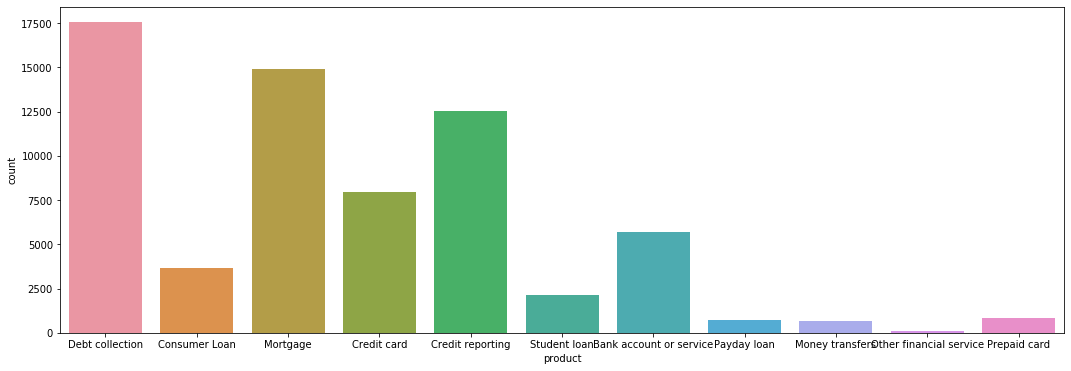

time: 437 ms


In [25]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1)

From this plot we can see Debt Collection and Mortgage received maximum number of complaints

We’ll now analyze the contingency table in form of plot to understand which product has more customer disputes on their complaints after resolving the issues

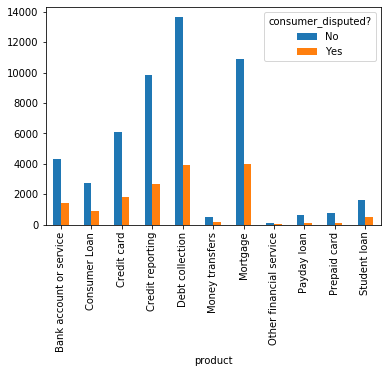

time: 371 ms


In [26]:
pd.crosstab(df1['product'],df1['consumer_disputed?']).plot(kind='bar')

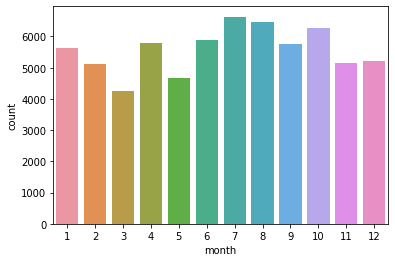

time: 284 ms


In [27]:
df1['date_received'] = pd.to_datetime(df1['date_received'])
df1['month'] = df1['date_received'].dt.month
sns.countplot(x='month',data=df1)

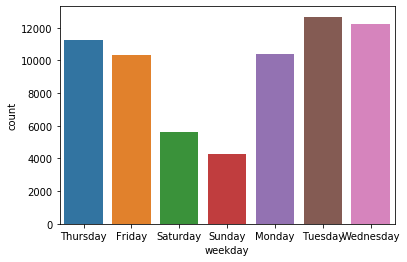

time: 272 ms


In [28]:
df1['weekday'] = df1['date_received'].dt.weekday_name
sns.countplot(x='weekday',data=df1)

# Text Preprocessing 

In [29]:
df1['consumer_complaint_narrative']= df1['consumer_complaint_narrative'].str.lower()
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")
df1['consumer_complaint_narrative'].head(1)

190126    has claimed i owe them 2700 for years despite ...
Name: consumer_complaint_narrative, dtype: object

time: 1.93 s


Removing Stopwords

In [30]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop = stopwords.words('english')

# df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))
# df1['consumer_complaint_narrative'].head(1)

time: 753 µs


In [31]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], 
                                                    test_size=0.25)

time: 105 ms


In [37]:
#label encoding target variable

enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

time: 34.4 ms


In [50]:
enc.inverse_transform(train_y)

array(['Consumer Loan', 'Debt collection', 'Mortgage', ..., 'Mortgage',
       'Mortgage', 'Mortgage'], dtype=object)

time: 10.5 ms


# Tokenizing text with scikit-learn 

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_x)
X_train_counts.shape

(50104, 57491)

time: 6.62 s


CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices

In [33]:
count_vect.vocabulary_.get(u'claimed')

11280

time: 5.29 ms


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(50104, 57491)

time: 49 ms


In [36]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(50104, 57491)

time: 224 ms


In [ ]:
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# Training 

Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [41]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_y)

time: 138 ms


# Predict 

In [66]:
X_new_counts = count_vect.transform(valid_x)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

# for doc, category in zip(valid_x, predicted):
#      print('%r => %s' % (doc, enc.inverse_transform(predicted)))

time: 2.28 s


In [70]:
predicted_cat= pd.DataFrame(enc.inverse_transform(predicted))

time: 2.42 ms


In [84]:
valid_x_df= pd.DataFrame(valid_x)
valid_x_df.reset_index(inplace= True, drop= True)
valid_x_df.shape

(16702, 1)

time: 6.87 ms


In [86]:
pred= pd.concat([valid_x_df, predicted_cat], axis= 1)
pred.tail(5)

,consumer_complaint_narrative,0
16697,while checking my personal credit report i dis...,Credit reporting
16698,hello i purchased our home at tx with a free ...,Mortgage
16699,i have worked for the same employer and have r...,Mortgage
16700,while reviewing my credit report i noticed an ...,Credit reporting
16701,midland funding is violating multiple sections...,Debt collection


time: 13.1 ms


In [91]:
 pd.set_option('display.max_colwidth', -1) 
print(pred.tail(3))

In [98]:
np.mean(predicted == valid_y)

0.657106933301401

time: 4.74 ms


# Building a pipeline

In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [93]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),])

time: 36.4 ms


In [96]:
text_clf.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

time: 6.37 s


# Evaluation of the performance on the test set¶


In [97]:
predicted = text_clf.predict(valid_x)
np.mean(predicted == valid_y)

0.657106933301401

time: 2.36 s


We achieved 65.7% accuracy. Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by simply plugging a different classifier object into our pipeline:

In [99]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
 ])

text_clf.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

time: 8.84 s


In [102]:
predicted = text_clf.predict(valid_x)
np.mean(predicted == valid_y)

0.7958328343910909

time: 2.51 s


We achieved 79.5% accuracy using the SVM. scikit-learn provides further utilities for more detailed performance analysis of the results:

In [106]:
from sklearn import metrics
print(metrics.classification_report(valid_y, predicted, target_names=set(enc.inverse_transform(valid_y))))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.73      0.77      1428
            Payday loan       0.86      0.32      0.47       920
               Mortgage       0.76      0.76      0.76      1982
            Credit card       0.78      0.82      0.80      3132
        Money transfers       0.76      0.89      0.82      4388
Other financial service       0.88      0.18      0.30       166
           Prepaid card       0.84      0.96      0.89      3730
          Consumer Loan       0.00      0.00      0.00        27
           Student loan       0.00      0.00      0.00       182
       Credit reporting       0.84      0.27      0.41       215
Bank account or service       0.92      0.59      0.72       532

               accuracy                           0.80     16702
              macro avg       0.68      0.50      0.54     16702
           weighted avg       0.79      0.80      0.78     16702

time: 54.9 ms


In [109]:
metrics.confusion_matrix(valid_y, predicted)

array([[1039,    6,  142,   58,   76,    2,   95,    0,    0,   10,    0],
       [  25,  295,   66,  115,  229,    1,  186,    0,    1,    0,    2],
       [  57,    3, 1499,  172,  207,    0,   43,    0,    0,    1,    0],
       [  13,   16,   73, 2581,  347,    0,   96,    0,    0,    0,    6],
       [  21,   14,   54,  261, 3905,    0,  116,    0,    1,    0,   16],
       [  50,    4,   12,    5,   39,   30,   26,    0,    0,    0,    0],
       [  11,    1,   13,   55,   78,    0, 3572,    0,    0,    0,    0],
       [   5,    0,    0,    3,   12,    1,    5,    0,    0,    0,    1],
       [  17,    3,   12,   12,   90,    0,   45,    0,    0,    0,    3],
       [  31,    2,  100,    4,   14,    0,    6,    0,    0,   58,    0],
       [   5,    0,    1,   22,  116,    0,   75,    0,    0,    0,  313]])

time: 26 ms


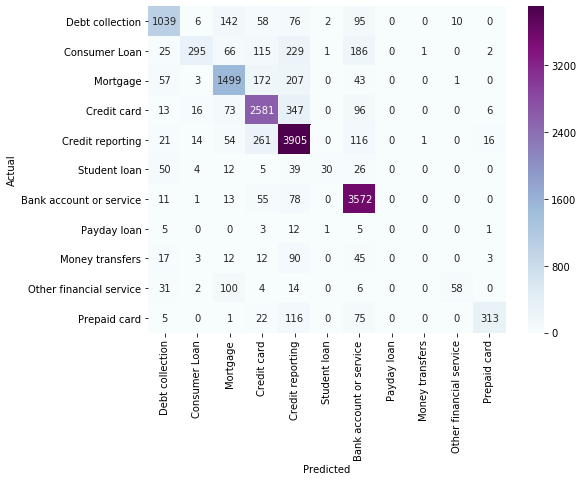

time: 778 ms


In [147]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As seen from the confusion matrix badly classified classes are 
: 
  1. Other financial service  mostly classified into Debt Collection
  2. Credit reporting mostly classified into Mortgage
  3. Pay Day loan into Money Transfers and prepaid card
                                                                 
Apart from these: Consumer Loan , Student Loan perfomed worst as precesion and recall both are 0.

# Parameter tuning using grid search¶

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values. We try out all classifiers on either words or bigrams, with or without idf, and with a penalty parameter of either 0.01 or 0.001 for the linear SVM:

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__alpha': (1e-2, 1e-3),}

time: 916 µs


In [112]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

time: 1.48 ms


In [117]:
train_x.shape

(50104,)

time: 2.85 ms


In [119]:
(5.01*50104)/(400*60)

10.459209999999999

time: 7.42 ms


In [120]:
gs_clf = gs_clf.fit(train_x, train_y)

time: 5min 48s


In [121]:
gs_clf.best_score_

0.7947668777802145

time: 4.61 ms


In [136]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(X_train_tfidf,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 16min 34s


In [137]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 3}
0.8492335377145122
time: 2.73 ms


In [138]:
for param in grid_lr.get_params().keys():
    print(param)

cv
error_score
estimator__C
estimator__class_weight
estimator__dual
estimator__fit_intercept
estimator__intercept_scaling
estimator__l1_ratio
estimator__max_iter
estimator__multi_class
estimator__n_jobs
estimator__penalty
estimator__random_state
estimator__solver
estimator__tol
estimator__verbose
estimator__warm_start
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose
time: 66.9 ms


In [140]:
final_lr = LogisticRegression(C=3)
final_lr.fit(X_train_tfidf,train_y)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

time: 49.5 s


In [141]:
final_lr_predict = final_lr.predict(X_new_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)

time: 54.1 ms


In [142]:
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.847263800742426
time: 2.15 ms


In [144]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.80      1428
          Consumer Loan       0.75      0.62      0.68       920
               Mortgage       0.81      0.83      0.82      1982
            Credit card       0.85      0.86      0.86      3132
       Credit reporting       0.82      0.88      0.85      4388
           Student loan       0.82      0.54      0.65       166
Bank account or service       0.93      0.95      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.54      0.29      0.38       182
Other financial service       0.82      0.64      0.72       215
           Prepaid card       0.90      0.77      0.83       532

               accuracy                           0.85     16702
              macro avg       0.73      0.65      0.68     16702
           weighted avg       0.84      0.85      0.84     16702

time: 52.7 ms


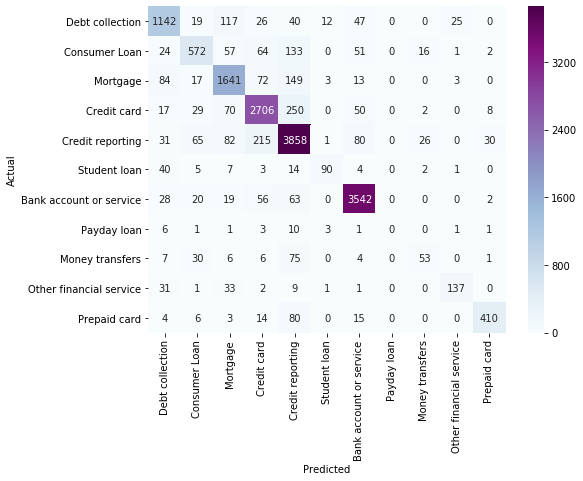

time: 1.05 s


In [146]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

84.9% with a Logistic Regression model.
Payday loan - this might be due to less training instances of this product 
it is mostly being predicted as Credit reporting or debt collection , is similar to one another or maybe linked with other.

# SVM

In [159]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(X_train_tfidf,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 1s


In [161]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 1}
0.8506106836322365
time: 94.3 ms


In [163]:
final_svc = LinearSVC(C=1)
final_svc.fit(X_train_tfidf,train_y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

time: 5.3 s


In [164]:
final_svc_predict = final_svc.predict(X_new_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.8508561848880374
time: 48.5 ms


In [165]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.79      0.80      1428
          Consumer Loan       0.74      0.62      0.68       920
               Mortgage       0.80      0.84      0.82      1982
            Credit card       0.86      0.87      0.87      3132
       Credit reporting       0.83      0.88      0.85      4388
           Student loan       0.74      0.59      0.66       166
Bank account or service       0.93      0.95      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.56      0.33      0.42       182
Other financial service       0.81      0.73      0.77       215
           Prepaid card       0.91      0.80      0.85       532

               accuracy                           0.85     16702
              macro avg       0.73      0.67      0.70     16702
           weighted avg       0.85      0.85      0.85     16702

time: 45.1 ms


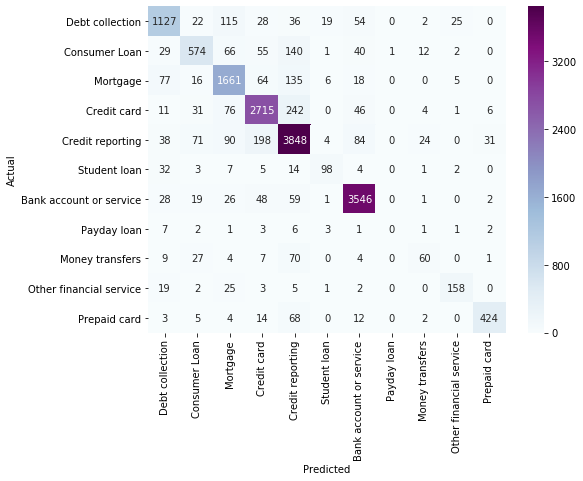

time: 792 ms


In [166]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We saw that accuracy got 85% slightly increased from Logistic Classifier 

# XGBOOST

In [169]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tfidf, train_y)
xgb_predict = xgb_model.predict(X_new_tfidf)
xgb_accuracy = metrics.accuracy_score(xgb_predict, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy)

XGBoost > Accuracy:  0.8097233864207879
time: 11min 32s


In [170]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, xgb_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.78      0.75      0.76      1428
          Consumer Loan       0.77      0.56      0.65       920
               Mortgage       0.79      0.77      0.78      1982
            Credit card       0.79      0.80      0.80      3132
       Credit reporting       0.77      0.85      0.81      4388
           Student loan       0.69      0.53      0.60       166
Bank account or service       0.91      0.93      0.92      3730
            Payday loan       1.00      0.04      0.07        27
        Money transfers       0.60      0.28      0.38       182
Other financial service       0.81      0.69      0.75       215
           Prepaid card       0.87      0.77      0.82       532

               accuracy                           0.81     16702
              macro avg       0.80      0.63      0.67     16702
           weighted avg       0.81      0.81      0.81     16702

time: 48.5 ms


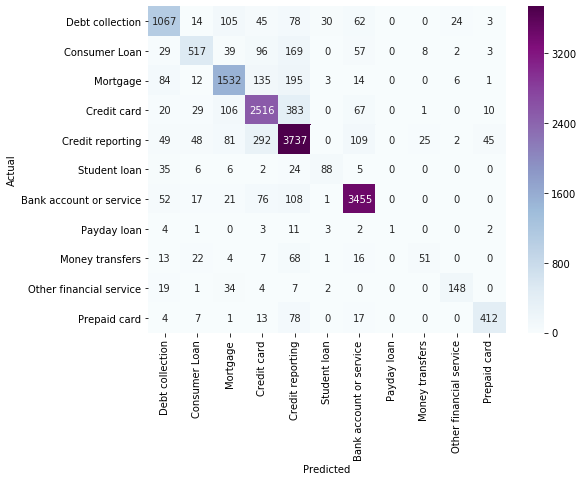

time: 802 ms


In [171]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, xgb_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Hyperparameter tuning XGBOOST 

In [172]:
from xgboost import XGBClassifier
xgb_model2 = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model2.fit(X_train_tfidf, train_y)
xgb_predict2 = xgb_model2.predict(X_new_tfidf)
xgb_accuracy2 = metrics.accuracy_score(xgb_predict2, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy2)

XGBoost > Accuracy:  0.8475032930188001
time: 1h 11min 35s


# Deep Learning models


In [173]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

Using TensorFlow backend.


time: 9.49 s


In [174]:
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_x.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(train_x.values)
test_sequences = tokenizer.texts_to_sequences(valid_x.values)

time: 12.6 s


In [175]:
word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))

Found 57469 unique tokens.
time: 839 µs
